## Autores:

Luiza Lober de Souza Piva, nUSP: 9302292

Ricardo Camacho Tetti, nUSP: 10728098

In [ ]:
#Para a questão 5
!pip install git+https://github.com/riccardoscalco/Pykov@master #both Python2 and Python3
!pip install --upgrade git+https://github.com/riccardoscalco/Pykov@master

In [ ]:
#Configurações
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import norm
import random
import seaborn as sns
from io import BytesIO

#puxar arquivos do GitHub
import requests as rq

#Ignora alguns avisos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#semente aleatória
set_seed = 42

#Para a questão 5
import pykov
import io
import pathlib
import os

# Redes a serem usadas

### G1: Moviegalaxies - Social Networks in Movies - no.316

Rede no. 316 do dataset, representando as interações cena-a-cena dos personagens de Forrest Gump.

Descrição do arquivo:

*    89 nós (personagens);
*    369 conexões (interações na mesma cena);
*    Não há loops;
*    Rede com pesos (weighted), **sem direção**.
  * Vamos remover os pesos para os cálculos.


Rede disponível em [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3)

Maiores informações (metadata): [https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0)

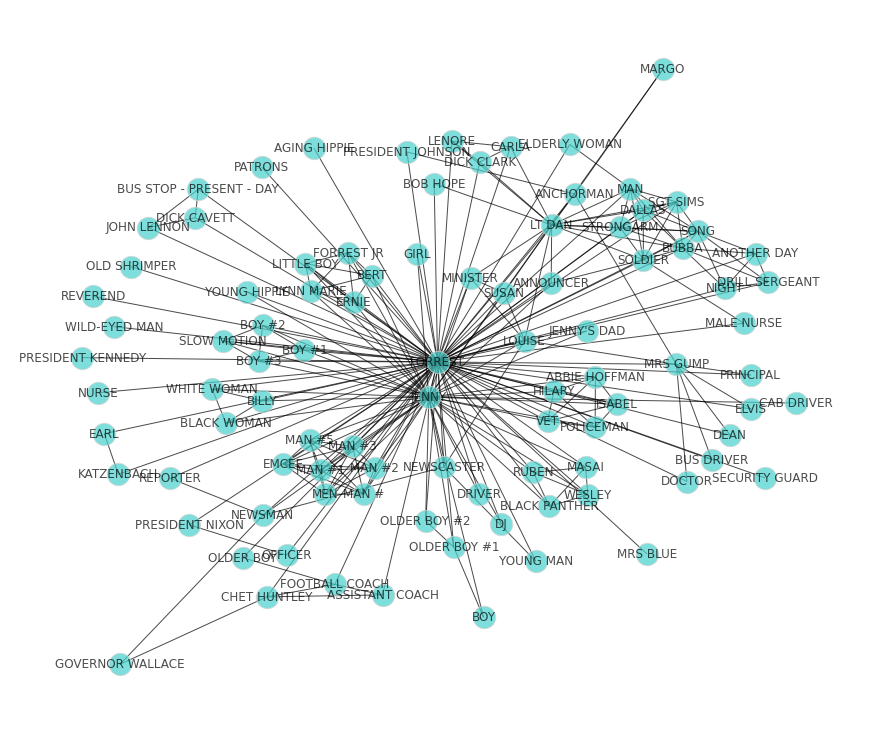

In [ ]:
#Lê o arquivo
url1 = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/trab-3/316.gexf'
data1 = rq.get(url1).content
G1 = nx.read_gexf(BytesIO(data1), relabel=True)

#Muda todos os valores de peso para 1
nx.set_edge_attributes(G1, values = 1, name = 'weight')

#Grafica a representação gráfica do grafo G1
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="mediumturquoise", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

## G2: Estados contíguos (EUA)

Rede no. 316 do dataset, representando as interações cena-a-cena dos personagens de Forrest Gump.

Descrição do arquivo:

*    49 nós (estados + distrito de Columbia);
*    107 conexões (borda);
*    Não há loops;
*    Rede sem pesos (weighted) e sem direção.


Rede disponível em [https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.contiguous-usa.tar.bz2](https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.contiguous-usa.tar.bz2)

Maiores informações (metadata): [https://github.com/luizalober/doc-disciplinas/tree/main/redes-comp-2s2022/data/trab-3](https://github.com/luizalober/doc-disciplinas/tree/main/redes-comp-2s2022/data/trab-3)

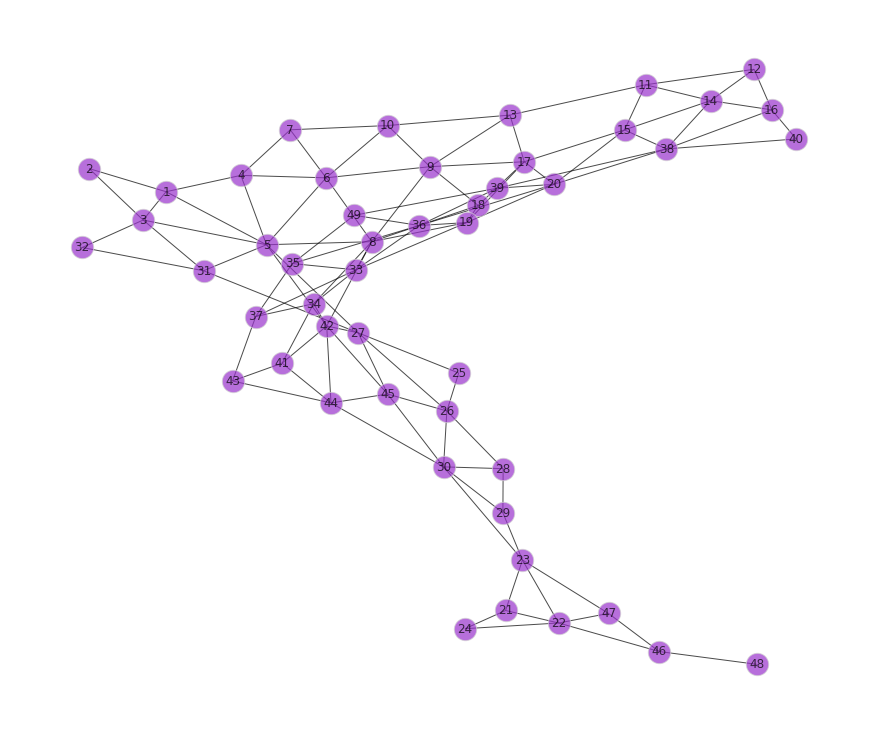

In [ ]:
#Lê o arquivo
url2 = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-3/out.contiguous-usa.txt'
data2 = rq.get(url2).content
G2 = nx.read_edgelist(BytesIO(data2), comments='%')

#Grafica a representação gráfica do grafo G2
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="darkorchid", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

# Q1. Similaridade estrutural

**Considere uma das medidas de similaridade estrutural. Mostre a distribuição de similaridade
entre todos os pares de vértices (histograma dos valores de similares considerando todos os pares
de vértices)**

### G1

Aqui, vamos utilizar a medida SimRank entre os nós da rede G1, que considera dois nós similares se eles forem referenciados por objetos similares. Ela é dada entre nós $a$ e $b$ por $s(a,b) \in [0,1]$, com cálculo detalhado em [[1]](https://en.wikipedia.org/wiki/SimRank).

In [ ]:
G1_int = nx.convert_node_labels_to_integers(G1)   #necessário para os cálculos posteriores.
sim_G1 = nx.simrank_similarity(G1_int)

O problema com esse cálculo é que temos 94 entradas, o que resultará no mesmo número de histogramas, cada um mostrando a similaridade entre um nó com os restantes (inclui auto-similaridade).
Vamos utilizar um [ridgeline chart](https://r-graph-gallery.com/ridgeline-plot) para tentar contornar esse problema.

In [ ]:
#Fonte: https://glowingpython.blogspot.com/2020/03/ridgeline-plots-in-pure-matplotlib.html
def ridgeline(data, overlap=0, fill=True, labels=None, n_points=150):
    """
    Creates a standard ridgeline plot.

    data, list of lists.
    overlap, overlap between distributions. 1 max overlap, 0 no overlap.
    fill, matplotlib color to fill the distributions.
    n_points, number of points to evaluate each distribution function.
    labels, values to place on the y axis to describe the distributions.
    """
    if overlap > 1 or overlap < 0:
        raise ValueError('overlap must be in [0 1]')
    xx = np.linspace(np.min(np.concatenate(data)),
                     np.max(np.concatenate(data)), n_points)
    curves = []
    ys = []
  
    for i, d in enumerate(data):
        pdf = gaussian_kde(d)
        y = i*(1.0-overlap)
        ys.append(y)
        curve = pdf(xx)
        if fill:
            plt.fill_between(xx, np.ones(n_points)*y, 
                             curve+y, zorder=len(data)-i+1, color=fill[i])
        plt.plot(xx, curve+y, c='w', zorder=len(data)-i+1)
    if labels:
        plt.yticks(ys, labels)

In [ ]:
mat_G1 = np.array( [[sim_G1[u][v] for v in G1_int] for u in G1_int] )

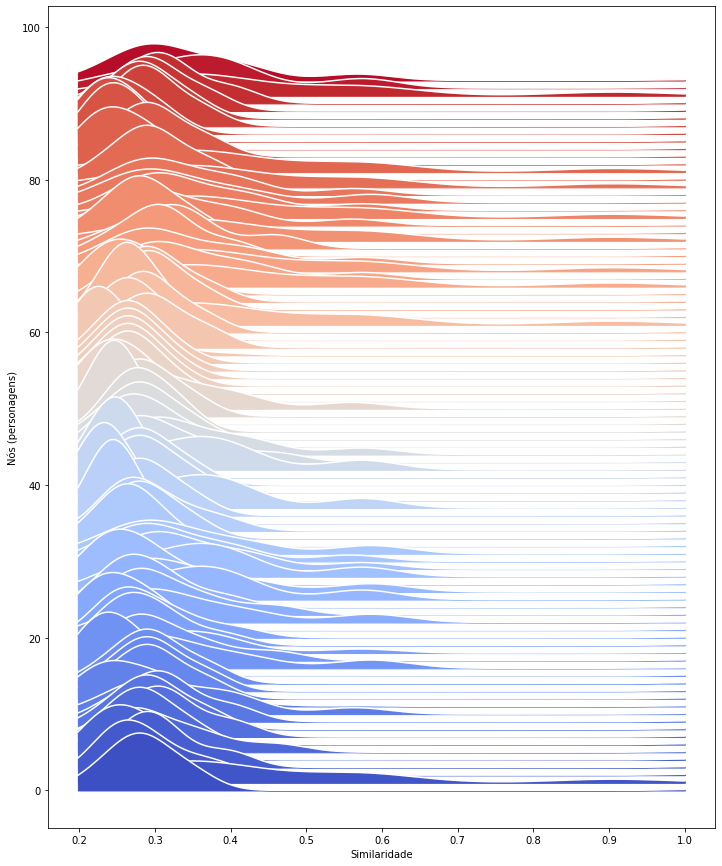

In [ ]:
fig, axs = plt.subplots(figsize=(10, 12))
plt.tight_layout()
pal = sns.color_palette(palette='coolwarm', n_colors=94)
ridgeline(data=mat_G1, overlap=0, fill=pal, labels=None)
axs.set_ylabel('Nós (personagens)')
axs.set_xlabel('Similaridade')
plt.show()

Alternativamente, também graficamos o heatmap com as similaridades acima.

In [ ]:
#Agora, converte essa matriz num dataframe
colunas = []
for i in range(0, len(mat_G1), 1):
  colunas.append(str('node_' + str(i)))

df_G1 = pd.DataFrame(mat_G1, columns=colunas)

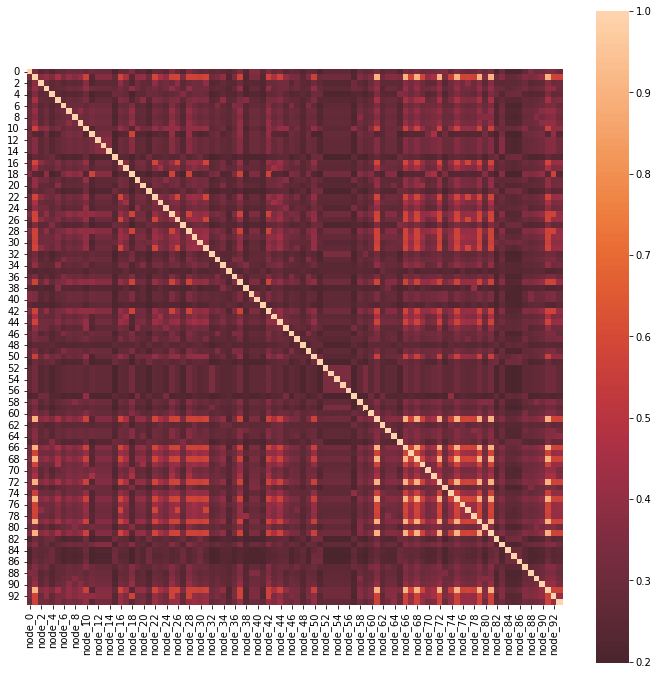

In [ ]:
#Primeiro, vamos dar uma olhada nos dados em forma de heatmap
plt.figure(figsize=(12,12))
#div_red_blue = sns.diverging_palette(220, 20, as_cmap=True)  #paleta de cores
sns.heatmap(df_G1, square=True, center=0, annot=False)
plt.show()

### G2

Agora, refaz o mesmo procedimento para a segunda rede.

In [ ]:
G2_int = nx.convert_node_labels_to_integers(G2)   #necessário para os cálculos posteriores.
sim_G2 = nx.simrank_similarity(G2_int)

In [ ]:
mat_G2 = np.array( [[sim_G2[u][v] for v in G2_int] for u in G2_int] )

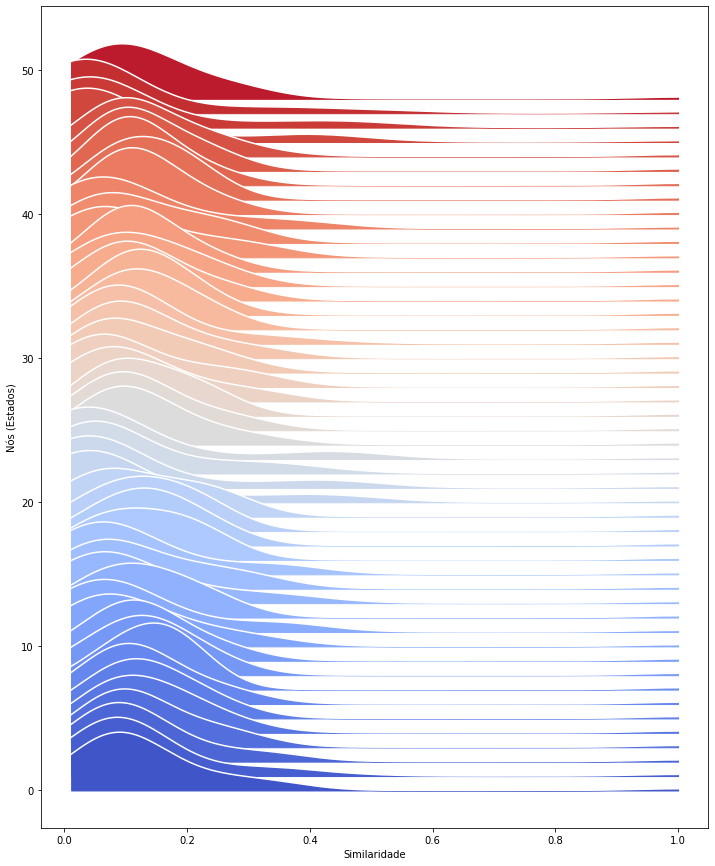

In [ ]:
fig, axs = plt.subplots(figsize=(10, 12))
plt.tight_layout()
pal = sns.color_palette(palette='coolwarm', n_colors=49)
ridgeline(data=mat_G2, overlap=0, fill=pal, labels=None)
axs.set_ylabel('Nós (Estados)')
axs.set_xlabel('Similaridade')
plt.show()

Abaixo, o heatmap para a rede 2:

In [ ]:
#Agora, converte essa matriz num dataframe
colunas = []
for i in range(0, len(mat_G2), 1):
  colunas.append(str('node_' + str(i)))

df_G2 = pd.DataFrame(mat_G2, columns=colunas)

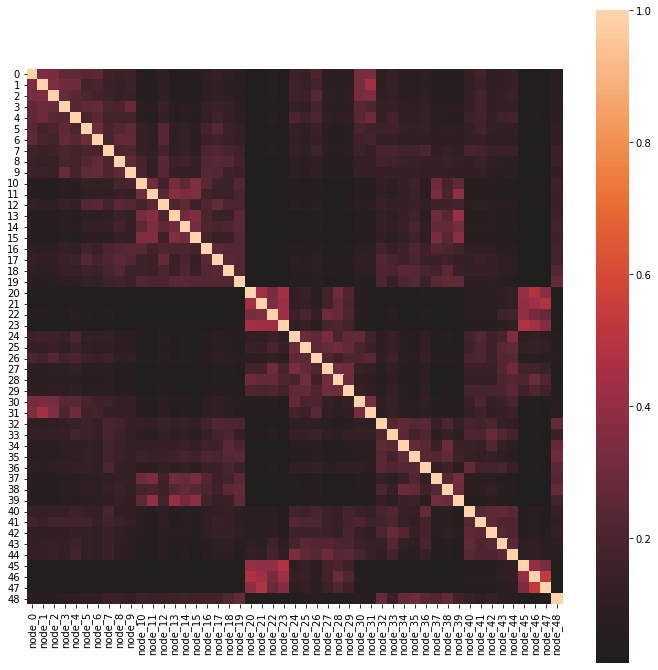

In [ ]:
#Primeiro, vamos dar uma olhada nos dados em forma de heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_G2, square=True, center=0, annot=False)
plt.show()

# Q2. Caminhos de comprimento 3, 4 e 5

**A similaridade estrutural é baseada no número de vizinhos compartilhados. Esta medida
também pode ser vista como o número de caminhos de comprimento 2 entre os vértices sendo
comparados. Repita o exercício 1, calculando o número de caminhos de comprimento 3, 4 e 5.
Discuta como a distribuição se modifica.**

Temos que o número de caminhos de comprimento $n$ entre os vizinhos $i$ e $j$ é dado por $A^n_{ij}$, onde essa matriz é a matriz de adjacência da nossa rede. Portanto, a similaridade entrutural baseada nessa medida é calculada com essa nova matriz, que é a matriz elevada a $n$, de onde então vamos calcular para $n = 3,4,5$.

## G1

In [ ]:
colunas=[]
for i in range(0,94,1):
  colunas.append(i)

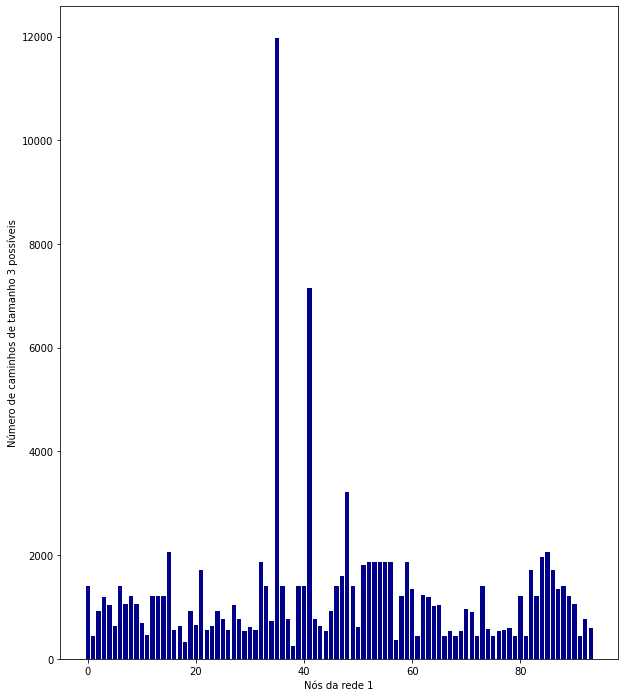

In [ ]:
G1_adj = nx.adjacency_matrix(G1)
G1_adj = G1_adj.toarray()
mat_G1_square = np.linalg.matrix_power(G1_adj, 3)

#Agora, cria um vetor que contém a soma de caminhos para cada nó,
#->isto é, cada entrada corresponderá ao total de caminhos de tamanho n para cada nó

caminhos1 = []
for no in range(0, len(mat_G1_square), 1):
  caminhos1.append(sum(mat_G1_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos1, color='darkblue')
axs.set_ylabel('Número de caminhos de tamanho 3 possíveis')
axs.set_xlabel('Nós da rede 1');

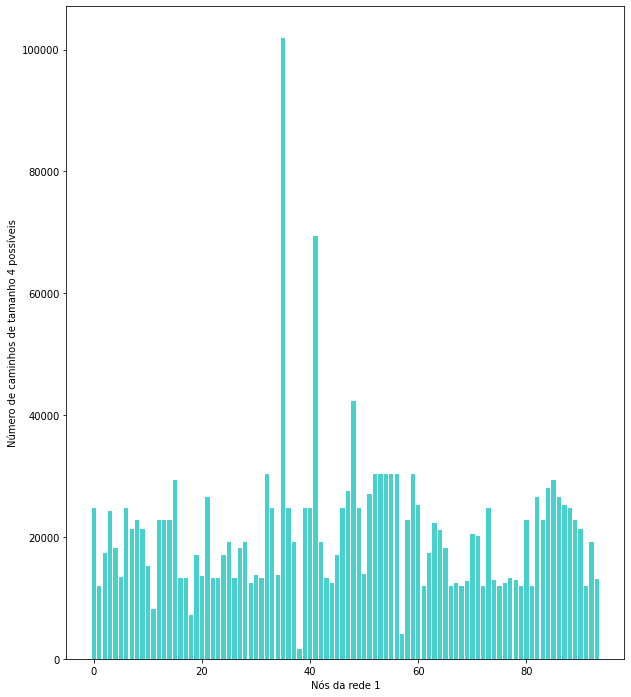

In [ ]:
G1_adj = nx.adjacency_matrix(G1)
G1_adj = G1_adj.toarray()
mat_G1_square = np.linalg.matrix_power(G1_adj, 4)

caminhos2 = []
for no in range(0, len(mat_G1_square), 1):
  caminhos2.append(sum(mat_G1_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos2, color='mediumturquoise')
axs.set_ylabel('Número de caminhos de tamanho 4 possíveis')
axs.set_xlabel('Nós da rede 1');

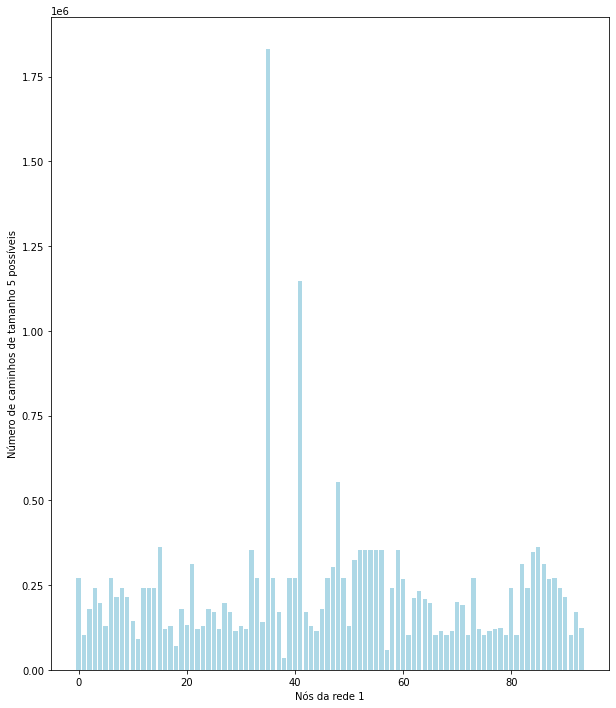

In [ ]:
G1_adj = nx.adjacency_matrix(G1)
G1_adj = G1_adj.toarray()
mat_G1_square = np.linalg.matrix_power(G1_adj, 5)

caminhos3 = []
for no in range(0, len(mat_G1_square), 1):
  caminhos3.append(sum(mat_G1_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos3, color='lightblue')
axs.set_ylabel('Número de caminhos de tamanho 5 possíveis')
axs.set_xlabel('Nós da rede 1');

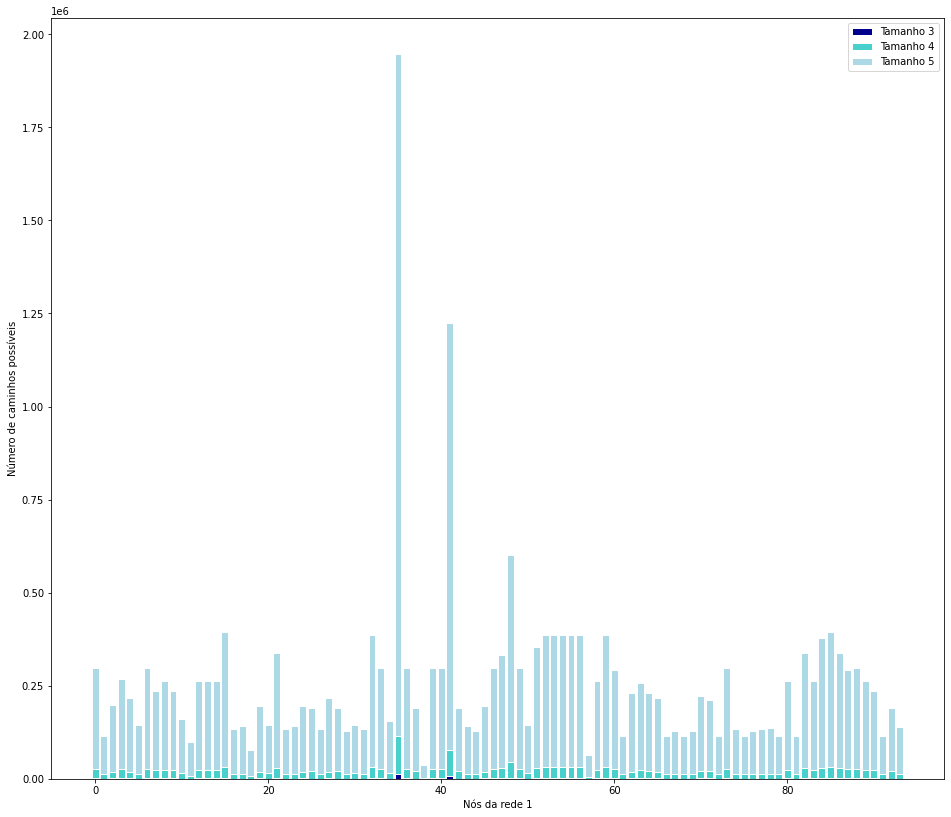

In [ ]:
#Comparando todos na mesma figura:

fig, axs = plt.subplots(figsize=(16, 14))

caminhos = np.add(caminhos1, caminhos2).tolist()

plt.bar(colunas, caminhos1, color='darkblue', edgecolor='white', label='Tamanho 3')
plt.bar(colunas, caminhos2, bottom=caminhos1, color='mediumturquoise', edgecolor='white', label='Tamanho 4')
plt.bar(colunas, caminhos3, bottom=caminhos, color='lightblue', edgecolor='white', label='Tamanho 5')

axs.set_ylabel('Número de caminhos possíveis')
axs.set_xlabel('Nós da rede 1');

plt.legend()
plt.show()

## G2

In [ ]:
colunas=[]
for i in range(0,len(G2),1):
  colunas.append(i)

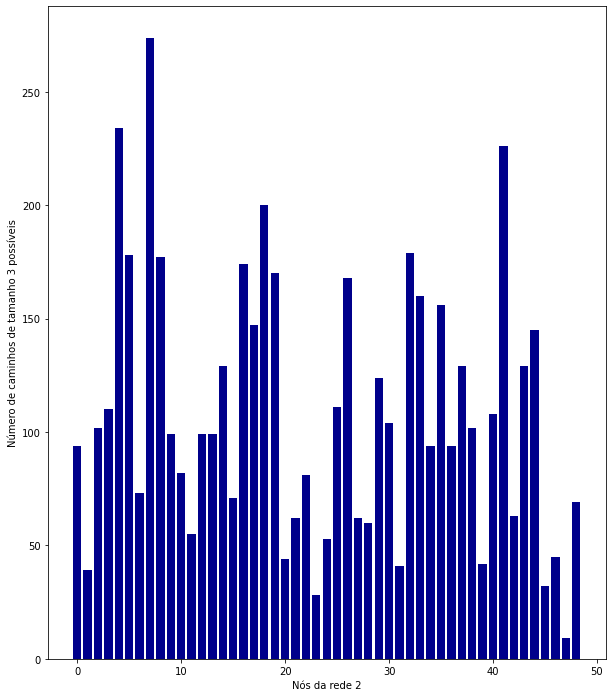

In [ ]:
G2_adj = nx.adjacency_matrix(G2)
G2_adj = G2_adj.toarray()
mat_G2_square = np.linalg.matrix_power(G2_adj, 3)

#Agora, cria um vetor que contém a soma de caminhos para cada nó,
#->isto é, cada entrada corresponderá ao total de caminhos de tamanho n para cada nó

caminhos1 = []
for no in range(0, len(mat_G2_square), 1):
  caminhos1.append(sum(mat_G2_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos1, color='darkblue')
axs.set_ylabel('Número de caminhos de tamanho 3 possíveis')
axs.set_xlabel('Nós da rede 2');

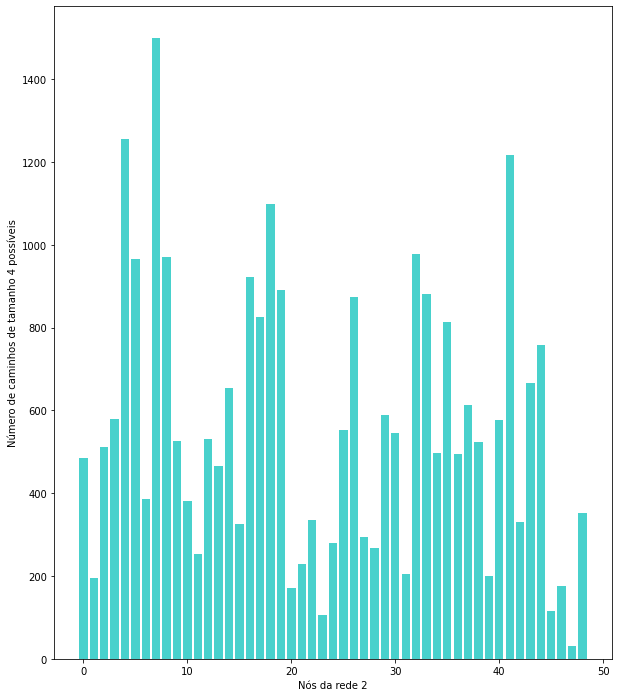

In [ ]:
mat_G2_square = np.linalg.matrix_power(G2_adj, 4)

caminhos2 = []
for no in range(0, len(mat_G2_square), 1):
  caminhos2.append(sum(mat_G2_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos2, color='mediumturquoise')
axs.set_ylabel('Número de caminhos de tamanho 4 possíveis')
axs.set_xlabel('Nós da rede 2');

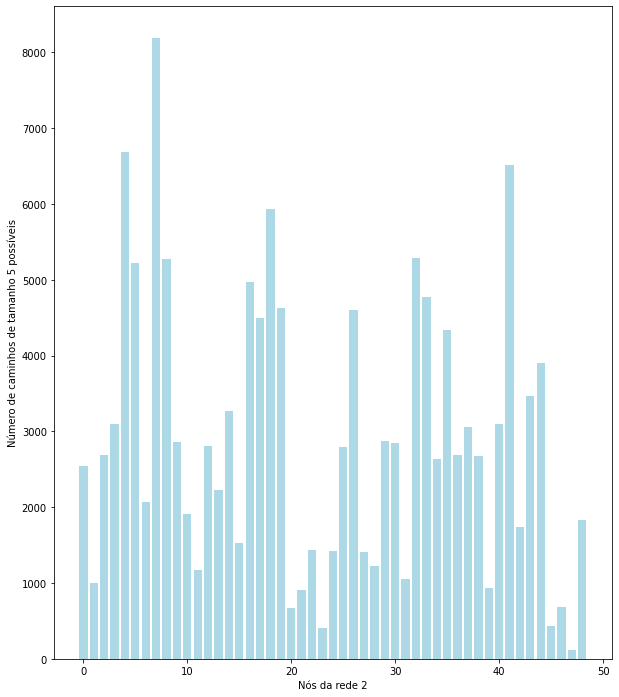

In [ ]:
mat_G2_square = np.linalg.matrix_power(G2_adj, 5)

caminhos3 = []
for no in range(0, len(mat_G2_square), 1):
  caminhos3.append(sum(mat_G2_square[no]))

fig, axs = plt.subplots(figsize=(10, 12))
axs.bar(colunas, caminhos3, color='lightblue')
axs.set_ylabel('Número de caminhos de tamanho 5 possíveis')
axs.set_xlabel('Nós da rede 2');

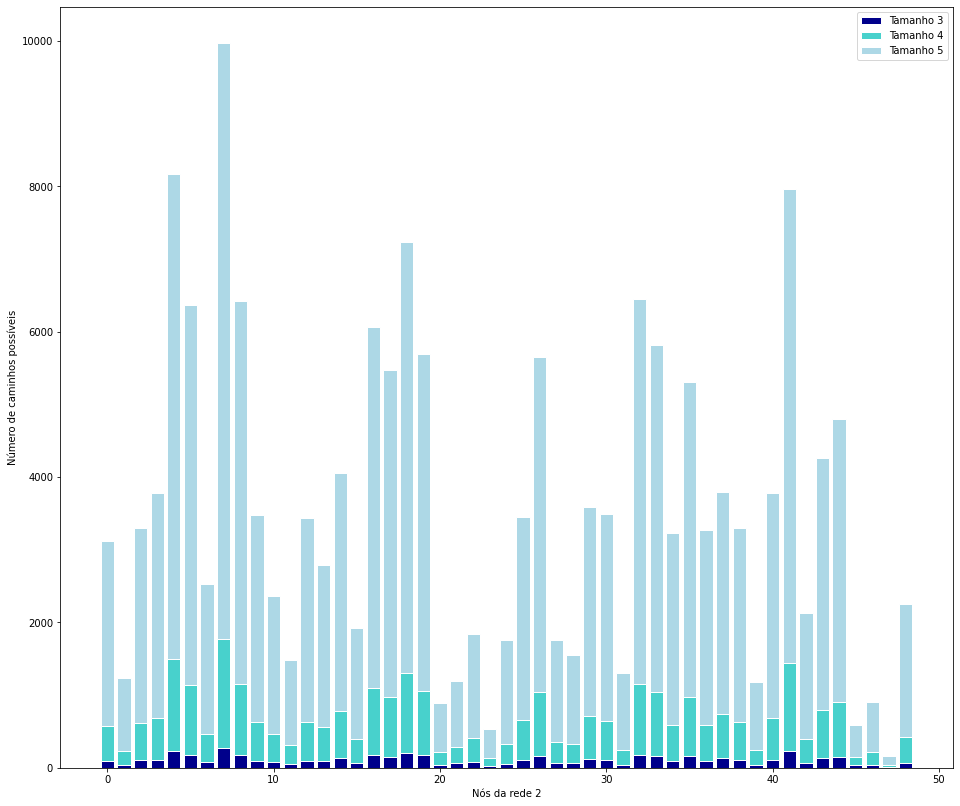

In [ ]:
#Comparando todos na mesma figura:

fig, axs = plt.subplots(figsize=(16, 14))

caminhos = np.add(caminhos1, caminhos2).tolist()

plt.bar(colunas, caminhos1, color='darkblue', edgecolor='white', label='Tamanho 3')
plt.bar(colunas, caminhos2, bottom=caminhos1, color='mediumturquoise', edgecolor='white', label='Tamanho 4')
plt.bar(colunas, caminhos3, bottom=caminhos, color='lightblue', edgecolor='white', label='Tamanho 5')

axs.set_ylabel('Número de caminhos possíveis')
axs.set_xlabel('Nós da rede 2');

plt.legend()
plt.show()

# Q3. Similaridade regular

**Considere uma das medidas de similaridade (equivalência) regular. Mostre a distribuição de
similaridade entre todos os pares de vértices (histograma dos valores de similares considerando
todos os pares de vértices). Discuta as diferenças encontradas com o histograma do exercício 1.**

A similaridade regular é definida por 
$σ = \sum_{m=0}^∞ (α A)^m$, onde $α$ é nossa razão de proporcionalidade definida por $1/k_1$ ($k_1$ é o maior autovalor da matriz de adjacência), que garante a convergência do somatório, e $A$ é nossa matriz de adjacência. 

## G1

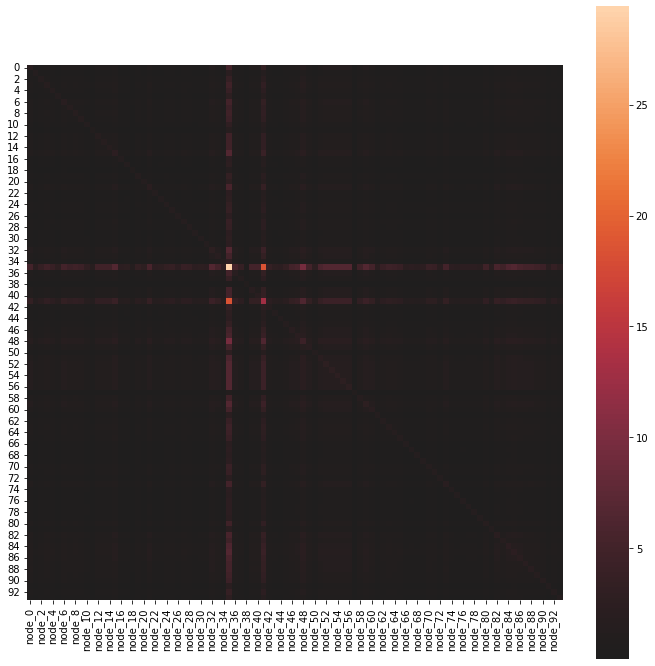

In [ ]:
G1_adj = nx.adjacency_matrix(G1)
G1_adj = G1_adj.todense()
eigen = np.linalg.eig((G1_adj))
lambda_max = np.linalg.norm(max(eigen[0]))
alpha = 1/lambda_max

sigma = []
for i in range(0,100):
  sigma.append(np.linalg.matrix_power(alpha*G1_adj, i))
sigma_sum_G1 = sum(sigma)

#Agora, converte essa matriz num dataframe
colunas = []
for i in range(0, len(sigma_sum_G1), 1):
  colunas.append(str('node_' + str(i)))

df_G1 = pd.DataFrame(sigma_sum_G1, columns=colunas)

plt.figure(figsize=(12,12))
#div_red_blue = sns.diverging_palette(220, 20, as_cmap=True)  #paleta de cores
sns.heatmap(df_G1, square=True, center=0, annot=False)
plt.show()

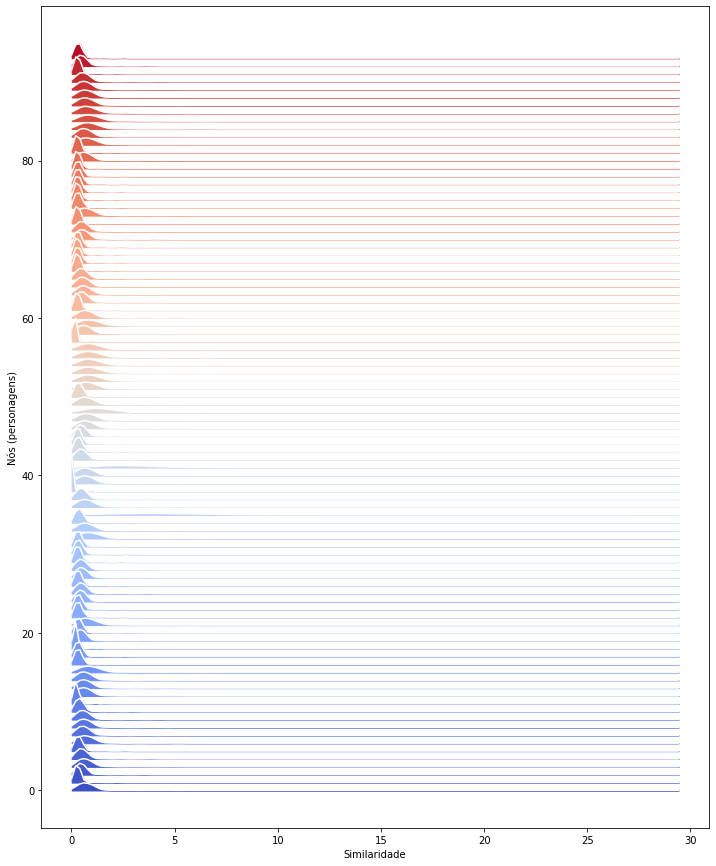

In [ ]:
fig, axs = plt.subplots(figsize=(10, 12))
plt.tight_layout()
pal = sns.color_palette(palette='coolwarm', n_colors=94)
ridgeline(data=sigma_sum_G1, overlap=0, fill=pal, labels=None)
axs.set_ylabel('Nós (personagens)')
axs.set_xlabel('Similaridade')
#axs.set_xlim(0,1)
plt.show()

## G2

In [ ]:
G2_adj = nx.adjacency_matrix(G2)
G2_adj = G2_adj.todense()
eigen = np.linalg.eig((G2_adj))
lambda_max = np.linalg.norm(max(eigen[0]))
alpha = 1/lambda_max

sigma = []
for i in range(0,100):
  sigma.append(np.linalg.matrix_power(alpha*G2_adj, i))
sigma_sum_G2 = sum(sigma)

In [ ]:
#Agora, converte essa matriz num dataframe
colunas = []
for i in range(0, len(sigma_sum_G2), 1):
  colunas.append(str('node_' + str(i)))

df_G2 = pd.DataFrame(sigma_sum_G2, columns=colunas)

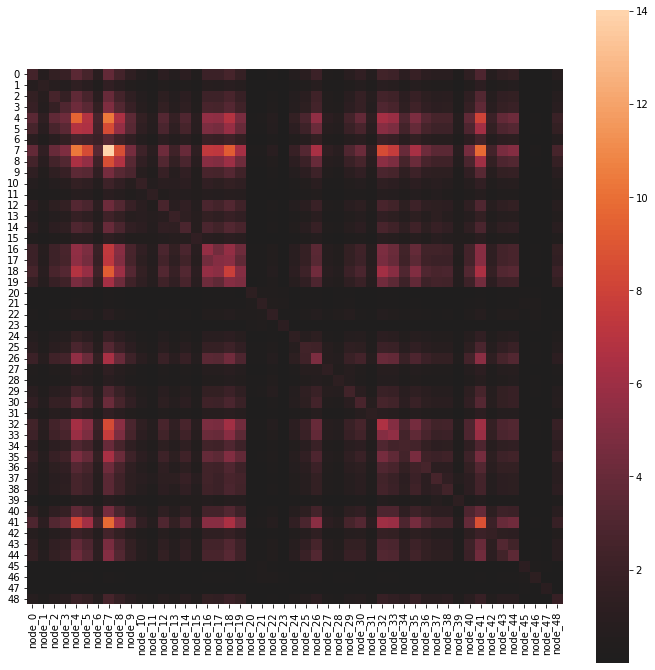

In [ ]:
plt.figure(figsize=(12,12))
#div_red_blue = sns.diverging_palette(220, 20, as_cmap=True)  #paleta de cores
sns.heatmap(df_G2, square=True, center=0, annot=False)
plt.show()

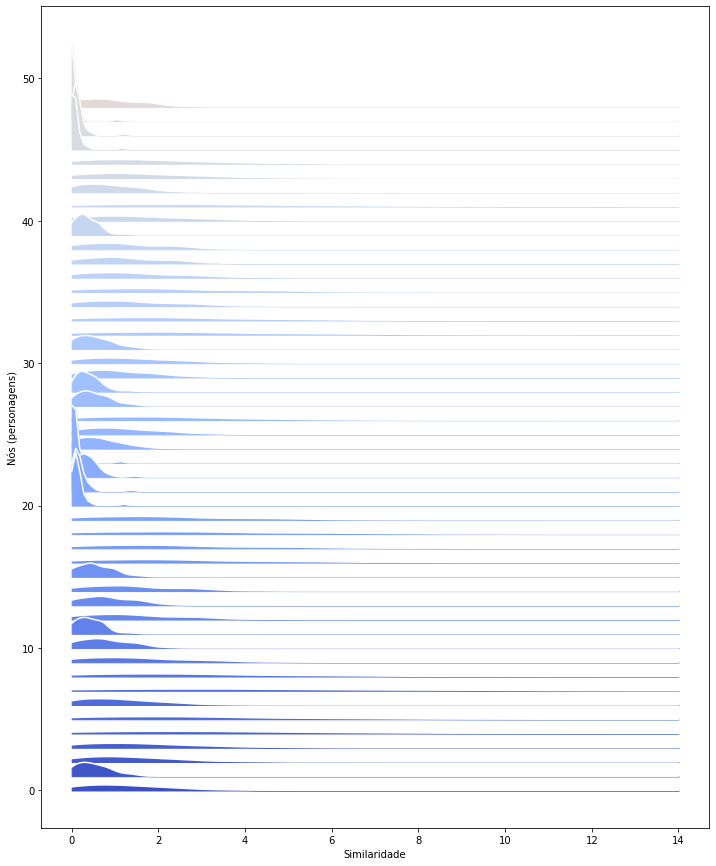

In [ ]:
fig, axs = plt.subplots(figsize=(10, 12))
plt.tight_layout()
pal = sns.color_palette(palette='coolwarm', n_colors=94)
ridgeline(data=sigma_sum_G2, overlap=0, fill=pal, labels=None)
axs.set_ylabel('Nós (personagens)')
axs.set_xlabel('Similaridade')
plt.show()

### Conclusão

Podemos observar que, apesar da maioria dos valores de similaridade desta medida estar concentrada entre 0 e 1 (rede 1), como observado para SimRank, existem valores na faixa de 15 a 25 para esta primeira rede, além de que o comportamento para a segunda é bastante distinto do observado em SimRank. 

Isto se deve à definição da similaridade regular acima não restringir os valores entre 0 e 1 como acontece durante o cálculo de SimRank.

# Q4. Node2vec

**Um método popular de cálculo de similaridade consiste na utilização do conceito de word
embeddings (sequências de símbolos) para calcular a similaridade entre vértices. Descreva
sucintamente como o método node2vec trabalha. Para consulta:
https://en.wikipedia.org/wiki/Node2vec**

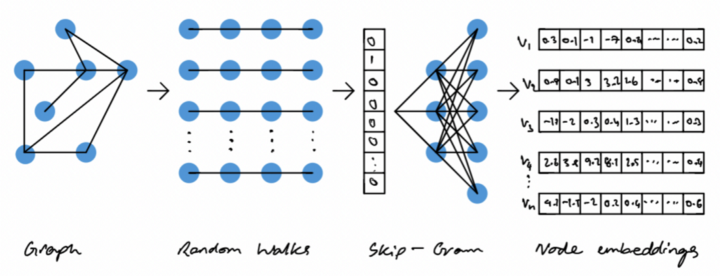

Figura 1: extração de características dos nós de um grafo simples. Cada valor na tabela corresponde a uma medida por nó de características de interesse realizada pelo `node2vec`. Figura de [[1]](https://towardsdatascience.com/node2vec-explained-db86a319e9ab).

Esse método tem como objetivo extrair características de nós de um dado grafo a partir de caminhos aleatórios na vizinhança de um dado nó. Esses caminhos resultantes são então representados como uma sequência de características - ou frases, com cada passo sendo uma palavra - que é depois interpretada pelo modelo [Skip-Gram](https://arxiv.org/abs/1301.3781v3). Este segundo modelo define as probabilidades de cada característica a partir de uma rede neural, que é treinada a partir de combinações par-a-par de todas as características de interesse, uma característica por vez, e define a probabilidade das mesmas estarem no contexto do grafo original.

Algumas implementações do algorítmo para Python:

*  [Node2vec no GitHub](https://github.com/aditya-grover/node2vec);
*  [Variante do código acima, com maior performance](https://github.com/snap-stanford/snap/tree/master/examples/node2vec)

# Q5. Caminhos aleatórios

**Assim como no método node2vec, caminhadas aleatórias também podem ser usadas para
calcular a similaridade entre vértices. O conceito de primeiro tempo de passagem (MFPT) do
vértice i ao vértice j corresponde ao número de passos que um agente caminhando de maneira
aleatória na rede leva para atingir j a partir de i pela primeira vez. Veja por exemplo:
https://en.wikipedia.org/wiki/Random_walk_closeness_centrality


**Selecione alguns pares de vértices de sua rede e calcule o MFPT entre eles via simulação. Verifique
se $MFPT(i,j) = MFPT(j,i)$**

Vale dizer que, dada a definição na referência, temos que essa medida não é simétrica para qualquer tipo de rede. É esperado que o resultado da verificação seja que $MFPT(i,j) \ne MFPT(j,i)$

Vamos usar o [pacote Pykov](https://github.com/riccardoscalco/Pykov) para poder calcular MFPT para esses nós.

In [ ]:
'''
Primeiro, antes de fazer as contas para MFPT, precisamos adicionar probabilidades de conexão
para cada um dos nós das duas redes.

O que eu fiz foi reescrever as mesmas como edgelists, com P=0.5 uniforme para TODOS
os nós. A validade dessa probabilidade é questionável.

Como essa transformação foi feita localmente, deixo os códigos abaixo somente para referência.
'''

'''
#-> Transforma a rede 1 com nós inteiros em uma edgelist simples (sem dados adicionais)
nx.write_edgelist(G1_int, '316.txt', comments='#', data=False) 



#-> Pega o caminho, rede 2
swp = '/home/llober/Documentos/0.doutorado/6.Aulas e cursos/redes-para-computacao-2s2022/data/trab-3/out.contiguous-usa.txt'
'''

In [ ]:
'''
Aqui, adiciona a probabilidade uniforme.
Seria possível adicionar um outro valor com str(prob_nova) na soma da linha,
mas a questão seria como calcular essa probabilidade.
'''

'''
#Para a rede 1, após gerar a edgelist da mesma
with open('316.txt', 'r') as istr:
    with open('output.txt', 'w') as ostr:
        for i, line in enumerate(istr):
            line = line.rstrip('\n')
            line += str(' ' + '0.5')   #probabilidade de alcançar um nó depois de n passos
            print(line, file=ostr)



#Para a rede 2
with open(swp, 'r') as istr:
    with open('output.txt', 'w') as ostr:
        for i, line in enumerate(istr):
            line = line.rstrip('\n')
            line += '0.5'   #probabilidade de alcançar um nó depois de n passos
            print(line, file=ostr)
'''

In [ ]:
#Lê as novas edgelists com probabilidades

#-> Rede 1
url_P1 = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-3/edgelists-with-probs/316-probs.txt'
data_P1 = rq.get(url_P1).content
pathlib.Path('G1-probs.txt').write_bytes(io.BytesIO(data_P1).getbuffer())   #cria uma cópia local
G1_pk = pykov.readmat('G1-probs.txt')

#-> Rede 2
url_P2 = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-3/edgelists-with-probs/contiguous-usa-probs.txt'
data_P2 = rq.get(url_P2).content
pathlib.Path('G2-probs.txt').write_bytes(io.BytesIO(data_P2).getbuffer())   #cria uma cópia local
G2_pk = pykov.readmat('G2-probs.txt')

Agora, mostra as MFPT para as redes

In [ ]:
#Define os nós que serão mostrados abaixo
nos_para_mostrar = ['0', '12', '23', '42']
nos_outra_ordem = ['42', '23', '12', '0' ]

In [ ]:
#Rede 1
res_G1 = []
res_G1_reverso = []

for nos in nos_para_mostrar:
  res_G1.append(dict(G1_pk.mfpt_to(nos)))

for nos in nos_outra_ordem:
  res_G1_reverso.append(dict(G1_pk.mfpt_to(nos)))

In [ ]:
#Rede 2
res_G2 = []
res_G2_reverso = []

for nos in nos_para_mostrar:
  res_G2.append(dict(G2_pk.mfpt_to(nos)))

for nos in nos_outra_ordem:
  res_G2_reverso.append(dict(G2_pk.mfpt_to(nos)))

Por fim, compara os resultados:

In [ ]:
#Rede 1
print(res_G1_reverso[0] == res_G1[3])
print(res_G1_reverso[1] == res_G1[2])
print(res_G1_reverso[2] == res_G1[1])
print(res_G1_reverso[3] == res_G1[0])

True
True
True
True


In [ ]:
#Rede 2
print(res_G2_reverso[0] == res_G2[3])
print(res_G2_reverso[1] == res_G2[2])
print(res_G2_reverso[2] == res_G2[1])
print(res_G2_reverso[3] == res_G2[0])

True
True
True
True


In [ ]:
#Apaga os arquivos criados acima
os.remove('G1-probs.txt')
os.remove('G2-probs.txt')

Logo, nesse caso temos a equivalência $MFPT(i,j) = MFPT(j,i)$, o que se deve às probabilidades nos arquivos serem uniformes. Essa afirmação se deve ao fato de que o MFPT de um nó $i$ para um nó $j$ é definido como:

$$H(i,j) = \sum_{r=1}^{∞} r P(i,j,r)$$

onde $r$ é o número de passos até $j$ e, nesse exercício, $P(i,j) = P(j,i) =\frac{1}{2}$ por simplicidade. Um valor $P \neq const.$ acarretaria em resultados não idênticos para $MFPT$.

Também seria possível utilizar as probabilidades de ir de um nó a outro de acordo com as aplicadas pelo modelo `Node2vec` [[1]](http://arxiv.org/abs/1607.00653), isto é:

$$P(c_{k} = i | c_{k-1} = j) = \begin{cases} \frac{\pi i j}{Z} ~&{\text{ se }}~(v,x) \in E~,\\0~&{\text{ caso contrário }}~\end{cases} $$

com $\pi i j$ sendo a probabilidade de transição entre os nós e $Z$ uma constante de normalização. Esta probabilidade já resultaria em $MFPT$ não simétrico.